# Đọc chuỗi thời gian 

1) Cung cấp một vài câu lệnh đọc chuỗi thời gian vào chương trình để thực hiện phân tích  

2) Vẽ hình 

3) Tạo bảng chuỗi thời gian với dữ liệu ngày tháng năm và dữ liệu ban đầu t, t-1, t-2

In [1]:
# Đọc chuỗi thời gian 
import pandas as pd 
df = pd.read_csv('daily-total-female-births.csv')


In [2]:
# Đọc 5 dữ liệu đầu tiên của chuỗi thời gian 
df.head(5)

,Date,Births
0,1/1/1959,35
1,1/2/1959,32
2,1/3/1959,30
3,1/4/1959,31
4,1/5/1959,44


In [3]:
# Mô tả chuỗi thời gian với số lượng dữ liệu, kỳ vọng (mean), độ lệch tiêu chuẩn (std), min, max và phân vị mức  0,25; 0,5; 0,75
df.describe()

,Births
count,365.000000
mean,41.980822
std,7.348257
min,23.000000
25%,37.000000
50%,42.000000
75%,46.000000
max,73.000000


In [4]:
dt = pd.Series(df.Births.to_list(),index=df.Date.to_list(), name="Thu")

In [5]:
dt.head(5)

1/1/1959    35
1/2/1959    32
1/3/1959    30
1/4/1959    31
1/5/1959    44
Name: Thu, dtype: int64

In [6]:
# Kích thước của chuỗi 
print(dt.size)

365


In [7]:
# Lấy một điểm dữ liệu 
dt['5/3/1959']

38

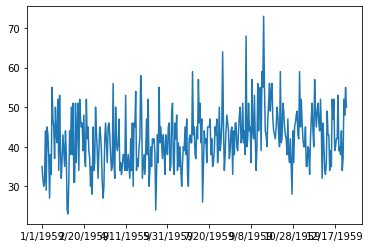

In [8]:
# Vẽ đồ thị chuỗi thời gian 
import matplotlib.pyplot as plt
dt.plot()
plt.show()

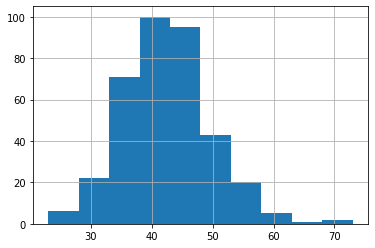

In [9]:
# Vẽ biểu đồ hist thực nghiệm của dữ liệu 
dt.hist()
plt.show()

In [10]:
dt

1/1/1959      35
1/2/1959      32
1/3/1959      30
1/4/1959      31
1/5/1959      44
              ..
12/27/1959    37
12/28/1959    52
12/29/1959    48
12/30/1959    55
12/31/1959    50
Name: Thu, Length: 365, dtype: int64

In [11]:
import datetime
dataframe = pd.DataFrame()
dataframe['year'] = [datetime.datetime.strptime(dt.index[i], '%m/%d/%Y').year  for i in range(len(dt))]
dataframe['month'] = [datetime.datetime.strptime(dt.index[i], '%m/%d/%Y').month  for i in range(len(dt))]
dataframe['day'] = [datetime.datetime.strptime(dt.index[i], '%m/%d/%Y').day for i in range(len(dt))]
dataframe['t'] = [dt[i] for i in range(len(dt))]
dataframe['t-1']=dataframe['t'].shift(1)
dataframe['t-2']=dataframe['t'].shift(2)
print(dataframe.head(5))

   year  month  day   t   t-1   t-2
0  1959      1    1  35   NaN   NaN
1  1959      1    2  32  35.0   NaN
2  1959      1    3  30  32.0  35.0
3  1959      1    4  31  30.0  32.0
4  1959      1    5  44  31.0  30.0


# Ví dụ 2

1) Chọn một tập dữ liệu chuỗi thời gian từ bất cứ nguồn nào hoặc tự tạo ra 
2) Vẽ đồ thị 
3) Tách ra được các thành phần trend, seasonal, residual 

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

In [13]:
data =pd.read_csv('data.csv', sep=",", parse_dates=["datetime"])
data["datetime"] = data["datetime"].dt.date
data.set_index("datetime", inplace=True)
data = data.asfreq("D")
data

,value
datetime,
2014-01-01,620107.7
2014-01-02,659865.2
2014-01-03,632536.8
2014-01-04,610251.7
2014-01-05,572534.1
...,...
2018-12-26,649103.9
2018-12-27,639571.2
2018-12-28,602541.7


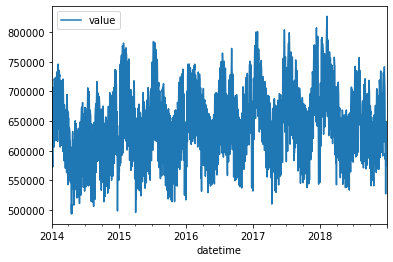

In [14]:
data.plot()
plt.show()

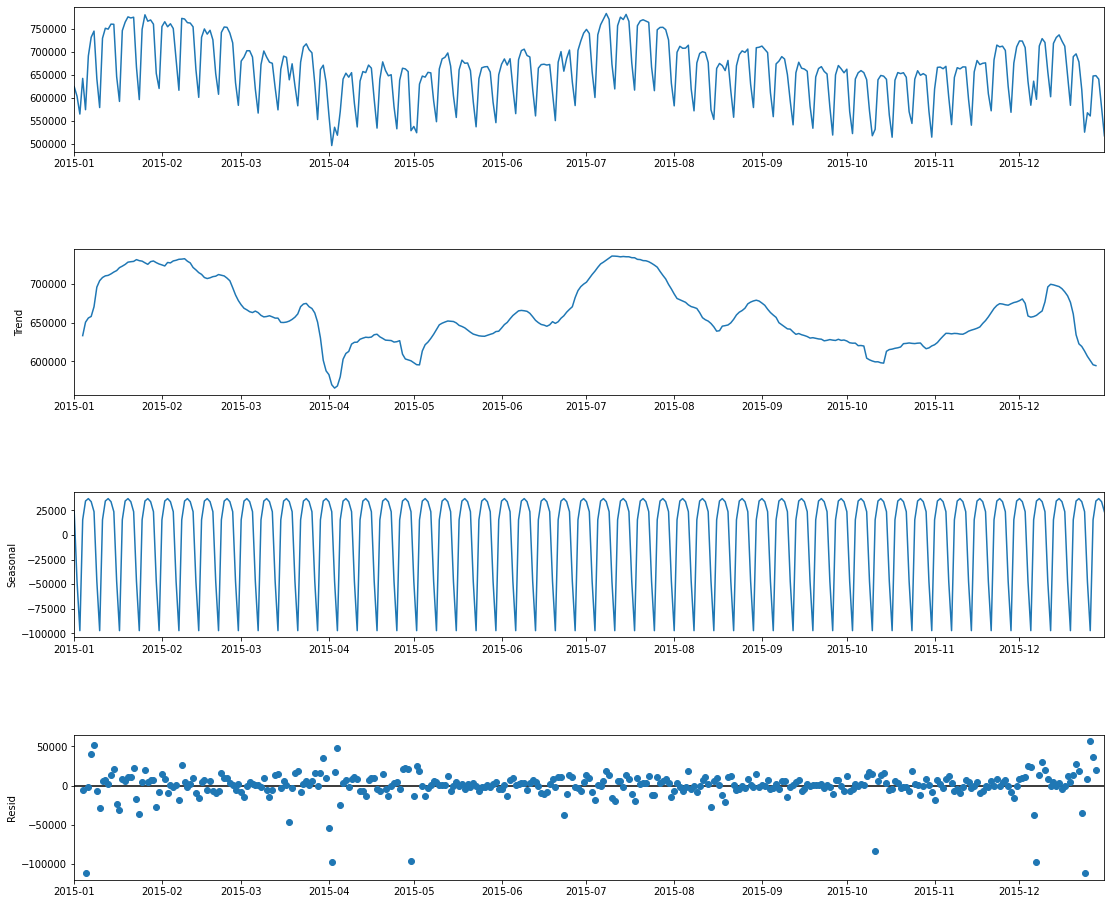

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data.loc["2015"], model='additive')
fig = result.plot()
fig.set_size_inches(18, 14)

Bài tập về nhà: 
 Cho bộ dữ liệu chất lượng không khí ở phần Dữ liệu gồm thông tin về chất lượng không khí theo ngày ở New York. Các biến gồm nhiều chỉ số chất lượng không khí. 
(a) Tải tập dữ liệu vào môi trường python. 

(b) Xét cấu trúc của tập dữ liệu.

(c) Vẽ đồ thị cho từng chuỗi có thể trong số bốn chuỗi 

(d) Nhận xét và phân tích về chuỗi thời gian 

In [16]:
import matplotlib
matplotlib.style.use('ggplot')
import matplotlib.pyplot as plt

In [17]:
air_data = pd.read_excel('AirQualityUCI.xlsx')

In [18]:
air_data

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.600,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.300,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.900,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.000,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.150,59.575001,0.788794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,2005-04-04,10:00:00,3.1,1314.25,-200,13.529605,1101.25,471.7,538.50,189.8,1374.25,1728.50,21.850,29.250000,0.756824
9353,2005-04-04,11:00:00,2.4,1162.50,-200,11.355157,1027.00,353.3,603.75,179.2,1263.50,1269.00,24.325,23.725000,0.711864
9354,2005-04-04,12:00:00,2.4,1142.00,-200,12.374538,1062.50,293.0,603.25,174.7,1240.75,1092.00,26.900,18.350000,0.640649
9355,2005-04-04,13:00:00,2.1,1002.50,-200,9.547187,960.50,234.5,701.50,155.7,1041.00,769.75,28.325,13.550000,0.513866


In [19]:
air_data.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,-34.207524,1048.869652,-159.090093,1.865576,894.475963,168.604200,794.872333,58.135898,1391.363266,974.951534,9.776600,39.483611,-6.837604
std,77.657170,329.817015,139.789093,41.380154,342.315902,257.424561,321.977031,126.931428,467.192382,456.922728,43.203438,51.215645,38.976670
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,0.600000,921.000000,-200.000000,4.004958,711.000000,50.000000,637.000000,53.000000,1184.750000,699.750000,10.950000,34.050000,0.692275
50%,1.500000,1052.500000,-200.000000,7.886653,894.500000,141.000000,794.250000,96.000000,1445.500000,942.000000,17.200000,48.550000,0.976823
75%,2.600000,1221.250000,-200.000000,13.636091,1104.750000,284.200000,960.250000,133.000000,1662.000000,1255.250000,24.075000,61.875000,1.296223
max,11.900000,2039.750000,1189.000000,63.741476,2214.000000,1479.000000,2682.750000,339.700000,2775.000000,2522.750000,44.600000,88.725000,2.231036


C:\Users\RedmiBook\AppData\Local\Temp\ipykernel_14540\1715019565.py:3: UserWarning: 'set_params()' not defined for locator of type <class 'pandas.plotting._matplotlib.converter.PandasAutoDateLocator'>
  plt.locator_params(axis='x', nbins=100)


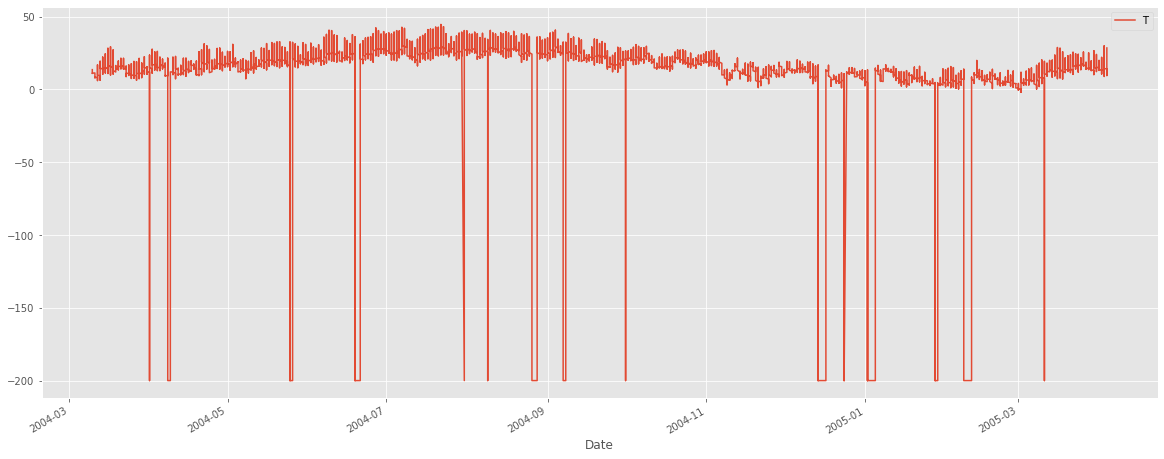

In [20]:

air_data.plot(x='Date', y=['T'], kind="line", figsize=(20, 8),rot=-0.5)
plt.xticks(rotation=30)
plt.locator_params(axis='x', nbins=100)
plt.show()

In [21]:
mean_oz = air_data.groupby(['Date'])['PT08.S5(O3)'].agg('mean').reset_index()
mean_oz

,Date,PT08.S5(O3)
0,2004-03-10,1096.041667
1,2004-03-11,885.031250
2,2004-03-12,1084.218750
3,2004-03-13,1245.781250
4,2004-03-14,1234.177083
...,...,...
386,2005-03-31,763.770833
387,2005-04-01,523.868056
388,2005-04-02,481.614583
389,2005-04-03,716.972222


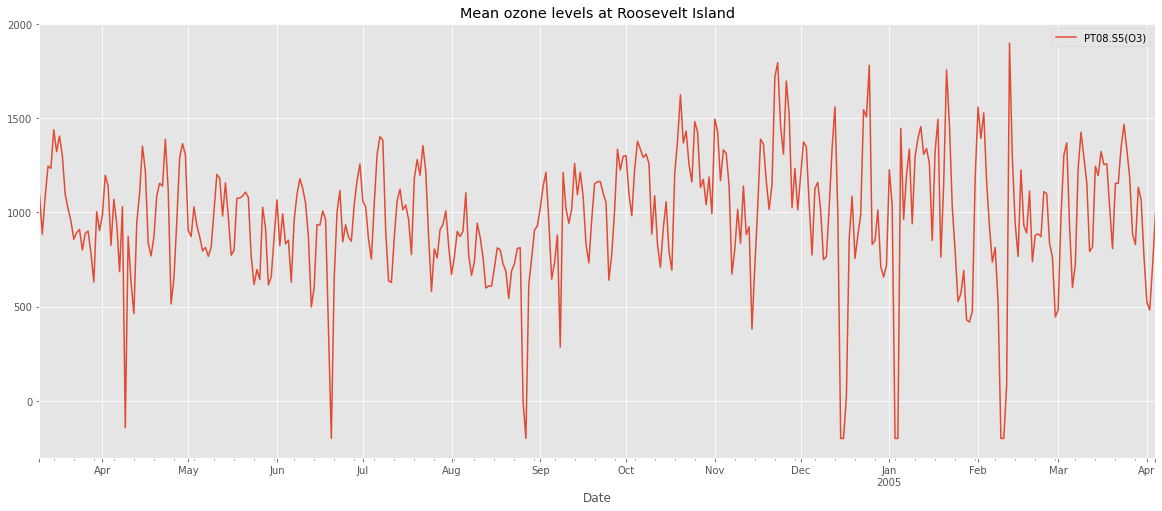

In [22]:
mean_oz.plot(x='Date',y='PT08.S5(O3)',figsize=(20, 8))
plt.title('Mean ozone levels at Roosevelt Island')
plt.show()

In [23]:
mean_temp = air_data.groupby(['Date'])['T'].agg('max').reset_index()
mean_temp

,Date,T
0,2004-03-10,13.600
1,2004-03-11,11.325
2,2004-03-12,16.875
3,2004-03-13,19.350
4,2004-03-14,22.225
...,...,...
386,2005-03-31,24.000
387,2005-04-01,19.925
388,2005-04-02,22.000
389,2005-04-03,30.000


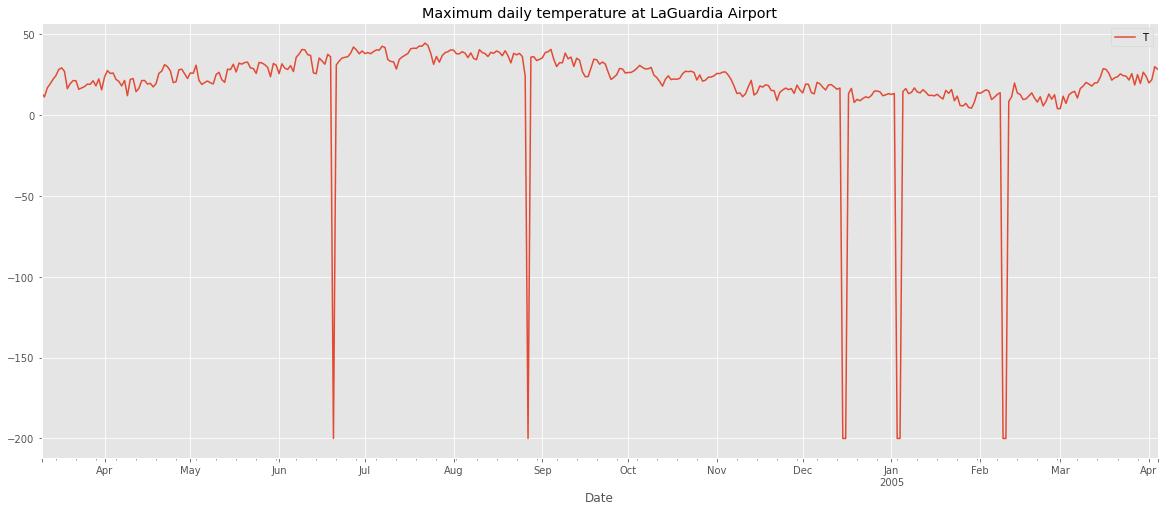

In [24]:
mean_temp.plot(x='Date',y='T',figsize=(20, 8))
plt.title('Maximum daily temperature at LaGuardia Airport')
plt.show()

In [25]:
dt = mean_oz.set_index('Date')
dt

,PT08.S5(O3)
Date,
2004-03-10,1096.041667
2004-03-11,885.031250
2004-03-12,1084.218750
2004-03-13,1245.781250
2004-03-14,1234.177083
...,...
2005-03-31,763.770833
2005-04-01,523.868056
2005-04-02,481.614583


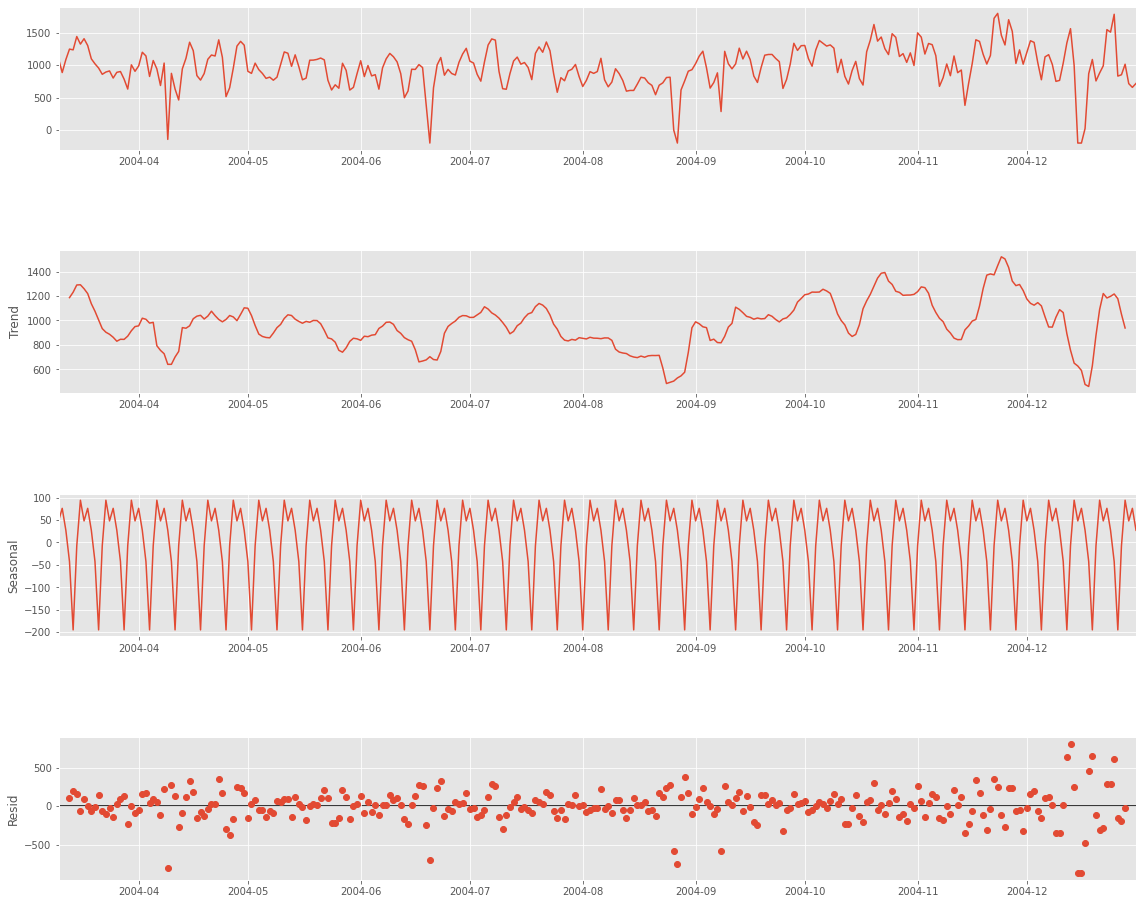

In [26]:
result = seasonal_decompose(dt.loc["2004"], model='additive')
fig = result.plot()
fig.set_size_inches(18, 14)

In [27]:
dt.loc["2005"]

,PT08.S5(O3)
Date,
2005-01-01,1226.288194
2005-01-02,1035.302083
2005-01-03,-200.000000
2005-01-04,-200.000000
2005-01-05,1446.500000
...,...
2005-03-31,763.770833
2005-04-01,523.868056
2005-04-02,481.614583
